In [1]:
import pandas as pd
from prophet import Prophet

In [3]:
#Read the data for daily page views for Peyton Manning on Wikipedia, logged

df = pd.read_csv('example_wp_log_peyton_manning.csv')
df.head()

ds         y
0  2007-12-10  9.590761
1  2007-12-11  8.519590
2  2007-12-12  8.183677
3  2007-12-13  8.072467
4  2007-12-14  7.893572

In [11]:
df.describe()

y
count  2905.000000
mean      8.138958
std       0.845957
min       5.262690
25%       7.514800
50%       7.997999
75%       8.580168
max      12.846747

In [4]:
m = Prophet()
m.fit(df)

INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [5]:
#Create the dates for the next year 

future = m.make_future_dataframe(periods=365)
future.tail()

ds
3265 2017-01-15
3266 2017-01-16
3267 2017-01-17
3268 2017-01-18
3269 2017-01-19

In [6]:
#Predict logged page views with bounds

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
3265 2017-01-15  8.213978    7.476580    8.906130
3266 2017-01-16  8.539051    7.854536    9.226069
3267 2017-01-17  8.326490    7.572470    9.052975
3268 2017-01-18  8.159151    7.401729    8.870389
3269 2017-01-19  8.171109    7.486363    8.855826

C:\Users\DW814QU\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\DW814QU\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



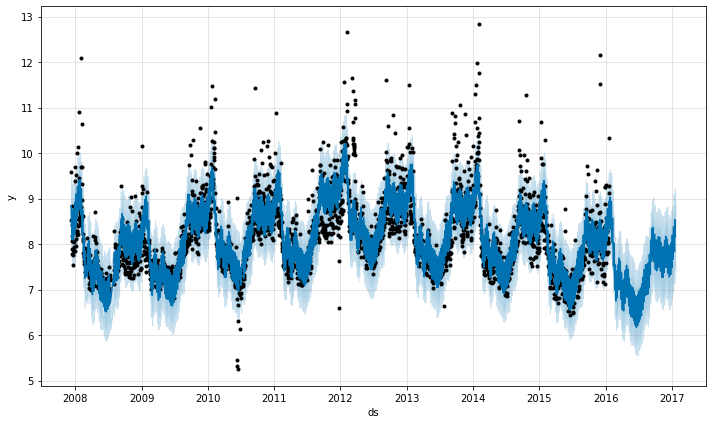

In [7]:
fig1 = m.plot(forecast)

C:\Users\DW814QU\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\DW814QU\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\DW814QU\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\DW814QU\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning:

Support for multi-dimensio

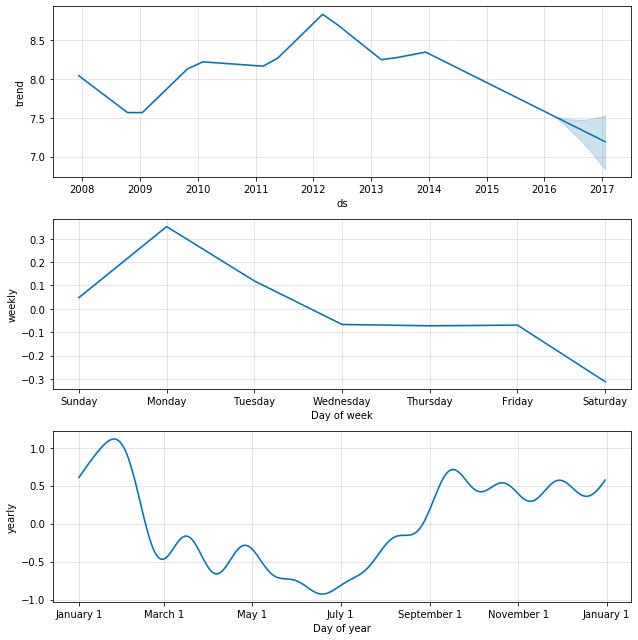

In [8]:
#Plot the trend and seasonality based on day of the week and year

fig2 = m.plot_components(forecast)

In [9]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [10]:
plot_components_plotly(m, forecast)